In [11]:
import pandas as pd
import numpy as np
import scipy
from matplotlib import pyplot as plt
import seaborn as sns


In [12]:
citynamelist=["bj","sh","gz","sz","zz"]
citynamelist_chinese=["北京","上海","广州","深圳","郑州"]
df_list=[]


In [13]:
result={}
for i in range(len(citynamelist)):
    filename=citynamelist[i]+"2.csv"
    """name_chinese,block,house_type,direct,area,price"""
    df = pd.read_csv(filename, encoding='utf-8-sig')
    df = df.drop_duplicates()  # 去重
    df = df.dropna()  # 去空值
    #输出数据数量
    print(citynamelist_chinese[i]+"的数据数量为：",len(df))
    df_list.append(df)
    

    

北京的数据数量为： 36478
上海的数据数量为： 27000
广州的数据数量为： 51413
深圳的数据数量为： 21303
郑州的数据数量为： 21796


In [14]:
direct_list=["东","南","西","北","东南","东北","西南","西北"]
def func(x):
    x=x.split("/")
    re=[]
    for i in range(len(x)):
        if x[i] in direct_list:
            re.append(x[i])
    return re
            


In [15]:
#统计各个城市不同朝向的房源数量，将朝向多的房源拆分
for i in range(len(citynamelist)):
    df_list[i]["direct"]=df_list[i]["direct"].apply(func)
    df_list[i]=df_list[i].explode("direct")
    result[citynamelist_chinese[i]]=df_list[i]["direct"].value_counts()
    print(citynamelist_chinese[i]+"的朝向数量为：",len(result[citynamelist_chinese[i]]))
    print(result[citynamelist_chinese[i]])
    print("--------------------------------------------------")

北京的朝向数量为： 8
direct
南     24878
北     16312
东      4287
西      3438
东南     1678
西南     1278
西北      742
东北      539
Name: count, dtype: int64
--------------------------------------------------
上海的朝向数量为： 8
direct
南     24728
北      4375
东       548
东南      511
西       407
西南      327
西北      102
东北       67
Name: count, dtype: int64
--------------------------------------------------
广州的朝向数量为： 8
direct
南     24290
北     11013
东南     8545
东      5005
西南     2397
东北     2051
西      1648
西北     1033
Name: count, dtype: int64
--------------------------------------------------
深圳的朝向数量为： 8
direct
南     8558
东南    4976
北     2286
西南    1613
东     1372
东北     721
西北     707
西      547
Name: count, dtype: int64
--------------------------------------------------
郑州的朝向数量为： 8
direct
南     15637
北      7834
东      1498
西      1111
东南      866
西南      532
西北      267
东北      162
Name: count, dtype: int64
--------------------------------------------------


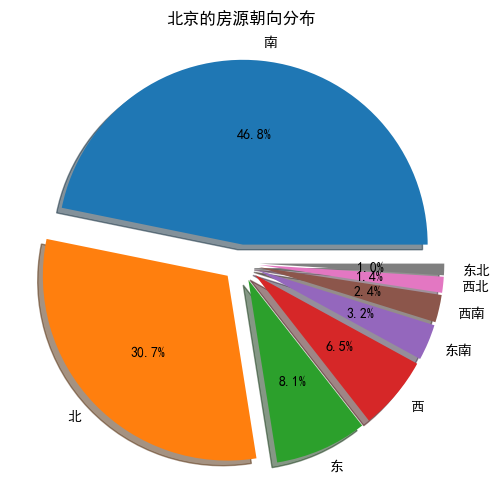

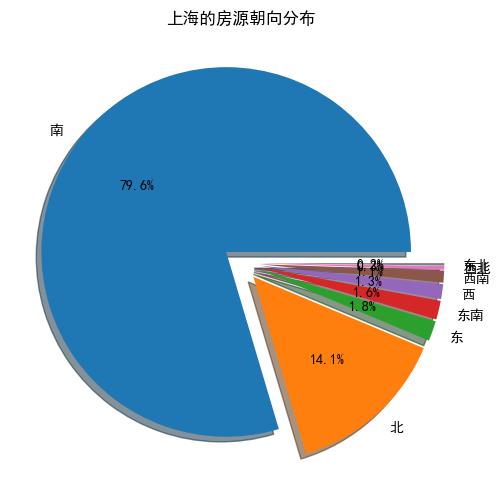

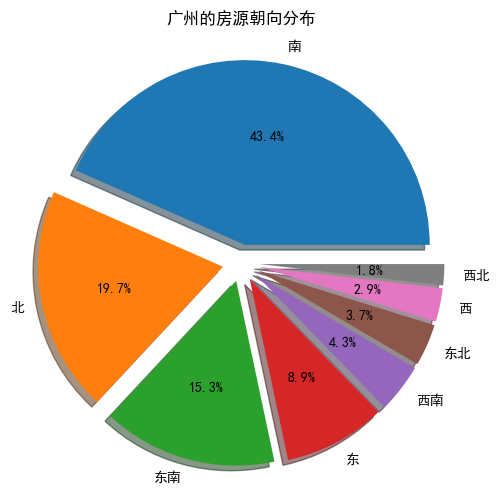

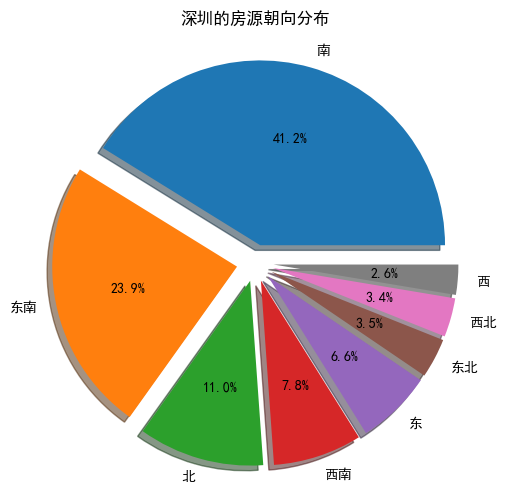

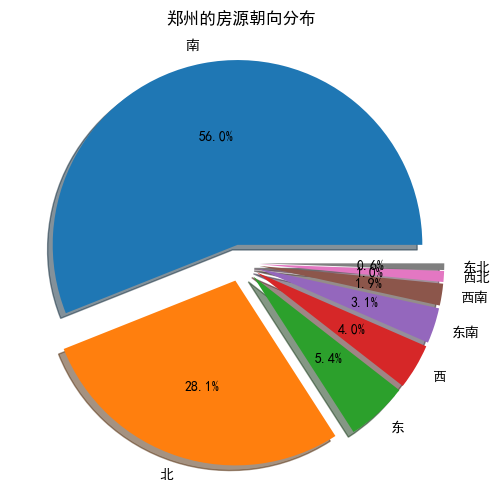

In [16]:
#根据每个城市的房源数量，绘制立体饼图
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
for i in range(len(citynamelist)):
    plt.figure(figsize=(6,6))
    plt.pie(result[citynamelist_chinese[i]],labels=result[citynamelist_chinese[i]].index,autopct='%1.1f%%', shadow=True,explode=[0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1],
        radius=1.0)
    plt.title(citynamelist_chinese[i]+"的房源朝向分布")
    #plt.savefig(citynamelist_chinese[i]+"的房源朝向分布.png")
    plt.show()


In [17]:
#统计各个城市不同朝向的房源的平均价格
for i in range(len(citynamelist)):
    result[citynamelist_chinese[i]]=df_list[i].groupby("direct")["price"].mean()
    print(citynamelist_chinese[i]+"的朝向数量为：",len(result[citynamelist_chinese[i]]))
    print(result[citynamelist_chinese[i]])
    print("--------------------------------------------------")

北京的朝向数量为： 8
direct
东     7857.652671
东北    9088.068646
东南    9500.353993
北     8924.468244
南     8245.506230
西     7818.780686
西北    9405.737197
西南    9491.229264
Name: price, dtype: float64
--------------------------------------------------
上海的朝向数量为： 8
direct
东      8327.903285
东北     6203.940299
东南     9134.663405
北      8036.834514
南      7756.771474
西      8476.341523
西北     8900.647059
西南    10794.256881
Name: price, dtype: float64
--------------------------------------------------
广州的朝向数量为： 8
direct
东     4303.518482
东北    4040.651877
东南    4551.244822
北     4633.964678
南     4554.509963
西     4411.240291
西北    4495.140368
西南    4682.175219
Name: price, dtype: float64
--------------------------------------------------
深圳的朝向数量为： 8
direct
东     8104.303936
东北    6977.545076
东南    8381.504823
北     8398.737533
南     8604.808483
西     7993.157221
西北    6600.312588
西南    7912.946063
Name: price, dtype: float64
--------------------------------------------------
郑州的朝向数量为： 8
direct
东    

Index(['东', '东北', '东南', '北', '南', '西', '西北', '西南'], dtype='object', name='direct')


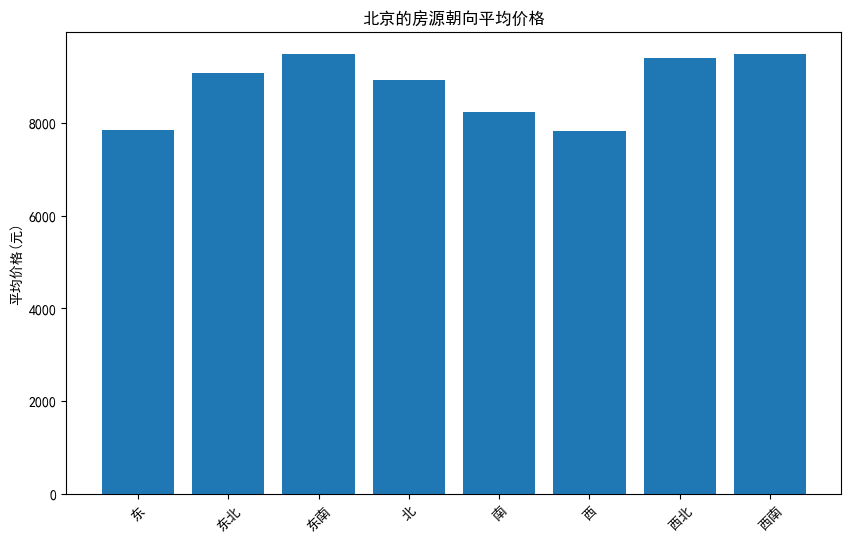

Index(['东', '东北', '东南', '北', '南', '西', '西北', '西南'], dtype='object', name='direct')


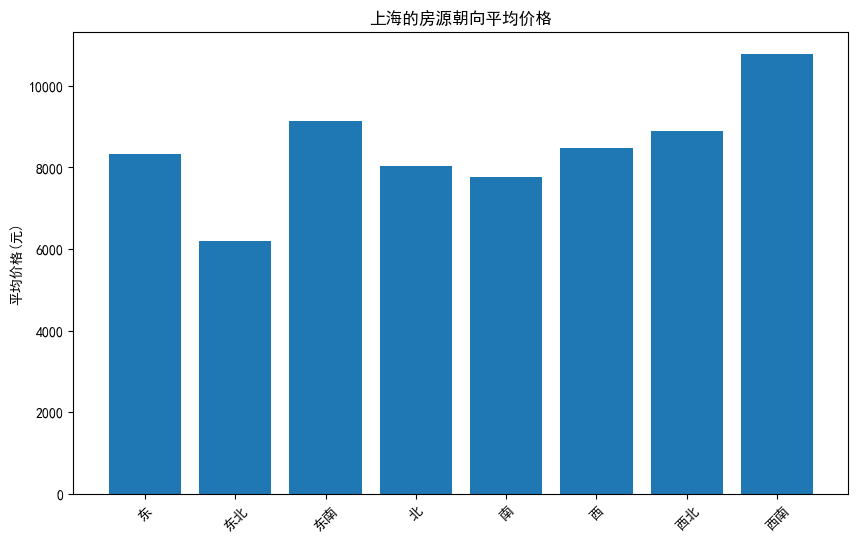

Index(['东', '东北', '东南', '北', '南', '西', '西北', '西南'], dtype='object', name='direct')


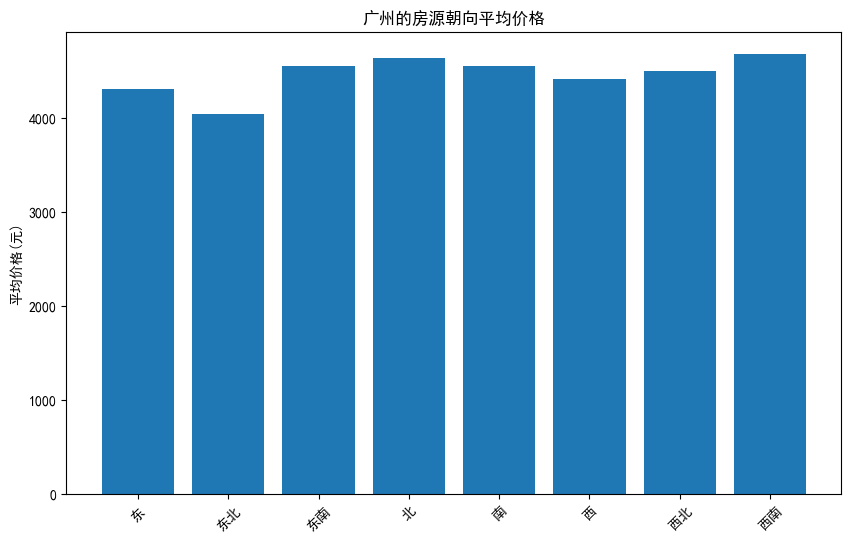

Index(['东', '东北', '东南', '北', '南', '西', '西北', '西南'], dtype='object', name='direct')


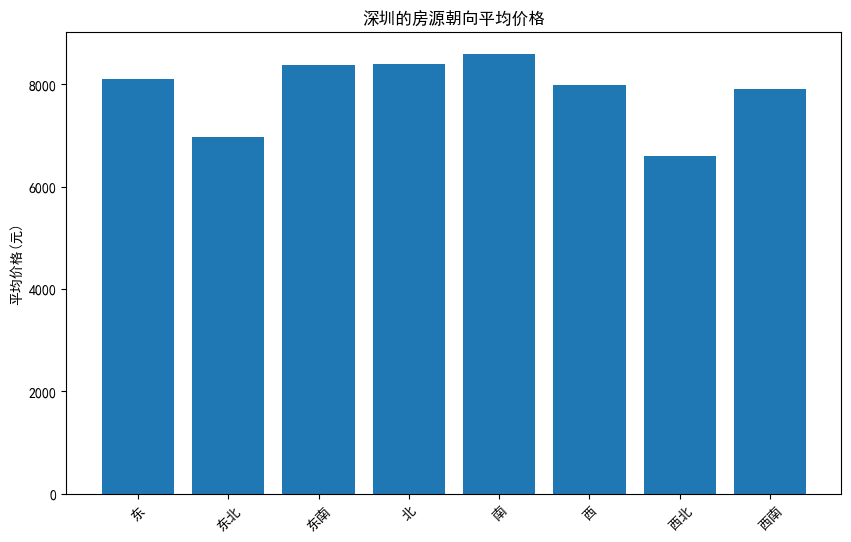

Index(['东', '东北', '东南', '北', '南', '西', '西北', '西南'], dtype='object', name='direct')


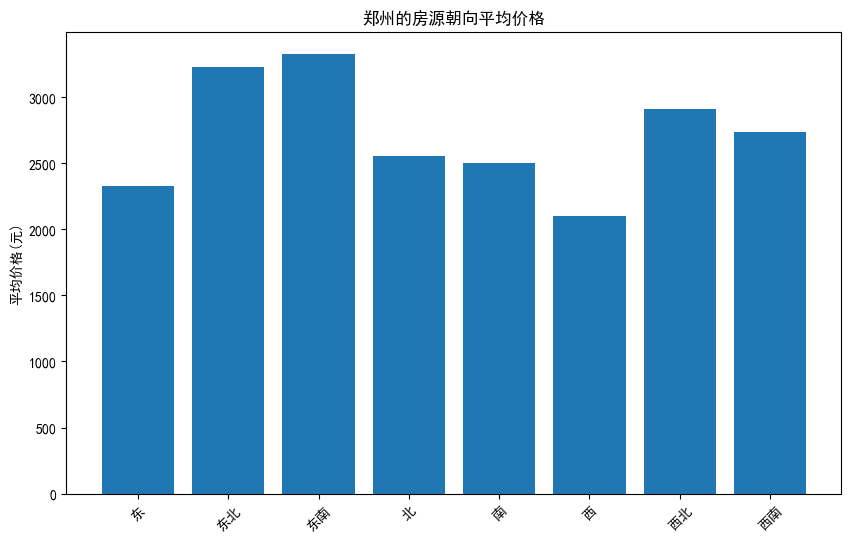

In [18]:
#绘图，输出各个城市不同朝向的房源的平均价格
for i in range(len(citynamelist)):
    plt.figure(figsize=(10,6))
    plt.bar(result[citynamelist_chinese[i]].index,result[citynamelist_chinese[i]].values)
    print(result[citynamelist_chinese[i]].index)
    plt.xticks(rotation=45)
    plt.ylabel("平均价格(元)")
    plt.title(citynamelist_chinese[i]+"的房源朝向平均价格")
    #plt.savefig(citynamelist_chinese[i]+"的房源朝向平均价格.png")
    plt.show()


In [33]:
#绘制热力图
for i in df_list:
    print(i)
for i in range(len(citynamelist)):
    plt.figure(figsize=(10,6))
    print()
    sns.heatmap(df_list[i].groupby(["direct","name_chinese"])["price"].mean().unstack(),annot=True,fmt='.0f',cmap='RdYlGn_r')
    plt.title(citynamelist_chinese[i]+"的房源朝向与板块的平均价格")
    #plt.savefig(citynamelist_chinese[i]+"的房源朝向与板块的平均价格.png")
    plt.show()

name_chinese           北京
direct                   
东             7857.652671
东北            9088.068646
东南            9500.353993
北             8924.468244
南             8245.506230
西             7818.780686
西北            9405.737197
西南            9491.229264
name_chinese            上海
direct                    
东              8327.903285
东北             6203.940299
东南             9134.663405
北              8036.834514
南              7756.771474
西              8476.341523
西北             8900.647059
西南            10794.256881
name_chinese     广州           广州
direct                          
东               NaN  4303.518482
东北              NaN  4040.651877
东南            500.0  4551.718984
北               NaN  4633.964678
南               NaN  4554.509963
西               NaN  4411.240291
西北              NaN  4495.140368
西南              NaN  4682.175219
name_chinese           深圳
direct                   
东             8104.303936
东北            6977.545076
东南            8381.504823
北         